In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [42]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [43]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [44]:
from llm_toolkit.logical_reasoning_utils import *

In [45]:
model_name = "Qwen2.5-7B-Instruct"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [46]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   text                                                       3000 non-null   object
 1   label                                                      3000 non-null   object
 2   title                                                      3000 non-null   object
 3   puzzle                                                     3000 non-null   object
 4   truth                                                      3000 non-null   object
 5   Qwen/Qwen2.5-7B-Instruct_torch.bfloat16_lf                 3000 non-null   object
 6   Qwen/Qwen2.5-7B-Instruct/checkpoint-35_torch.bfloat16_lf   3000 non-null   object
 7   Qwen/Qwen2.5-7B-Instruct/checkpoint-70_torch.bfloat16_lf   3000 non-null   object
 8   Qwen/Qwen2.5-7B-In

In [47]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'Qwen/Qwen2.5-7B-Instruct_torch.bfloat16_lf',
 'Qwen/Qwen2.5-7B-Instruct/checkpoint-35_torch.bfloat16_lf',
 'Qwen/Qwen2.5-7B-Instruct/checkpoint-70_torch.bfloat16_lf',
 'Qwen/Qwen2.5-7B-Instruct/checkpoint-105_torch.bfloat16_lf',
 'Qwen/Qwen2.5-7B-Instruct/checkpoint-140_torch.bfloat16_lf',
 'Qwen/Qwen2.5-7B-Instruct/checkpoint-175_torch.bfloat16_lf',
 'Qwen/Qwen2.5-7B-Instruct/checkpoint-210_torch.bfloat16_lf',
 'Qwen/Qwen2.5-7B-Instruct/checkpoint-245_torch.bfloat16_lf',
 'Qwen/Qwen2.5-7B-Instruct/checkpoint-280_torch.bfloat16_lf',
 'Qwen/Qwen2.5-7B-Instruct/checkpoint-315_torch.bfloat16_lf',
 'Qwen/Qwen2.5-7B-Instruct/checkpoint-350_torch.bfloat16_lf',
 'Qwen/Qwen2.5-7B-Instruct/shots-00',
 'Qwen/Qwen2.5-7B-Instruct/shots-05',
 'Qwen/Qwen2.5-7B-Instruct/shots-10',
 'Qwen/Qwen2.5-7B-Instruct/shots-20',
 'Qwen/Qwen2.5-7B-Instruct/shots-30',
 'Qwen/Qwen2.5-7B-Instruct/shots-40',
 'Qwen/Qwen2.5-7B-Instruct/shots-50']

In [48]:
perf_df = get_metrics_df(df)
perf_df

columns: ['Qwen/Qwen2.5-7B-Instruct_torch.bfloat16_lf', 'Qwen/Qwen2.5-7B-Instruct/checkpoint-35_torch.bfloat16_lf', 'Qwen/Qwen2.5-7B-Instruct/checkpoint-70_torch.bfloat16_lf', 'Qwen/Qwen2.5-7B-Instruct/checkpoint-105_torch.bfloat16_lf', 'Qwen/Qwen2.5-7B-Instruct/checkpoint-140_torch.bfloat16_lf', 'Qwen/Qwen2.5-7B-Instruct/checkpoint-175_torch.bfloat16_lf', 'Qwen/Qwen2.5-7B-Instruct/checkpoint-210_torch.bfloat16_lf', 'Qwen/Qwen2.5-7B-Instruct/checkpoint-245_torch.bfloat16_lf', 'Qwen/Qwen2.5-7B-Instruct/checkpoint-280_torch.bfloat16_lf', 'Qwen/Qwen2.5-7B-Instruct/checkpoint-315_torch.bfloat16_lf', 'Qwen/Qwen2.5-7B-Instruct/checkpoint-350_torch.bfloat16_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:478: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                model  \
0     0.0  Qwen2.5-7B-Instruct   
1     0.2  Qwen2.5-7B-Instruct   
2     0.4  Qwen2.5-7B-Instruct   
3     0.6  Qwen2.5-7B-Instruct   
4     0.8  Qwen2.5-7B-Instruct   
5     1.0  Qwen2.5-7B-Instruct   
6     1.2  Qwen2.5-7B-Instruct   
7     1.4  Qwen2.5-7B-Instruct   
8     1.6  Qwen2.5-7B-Instruct   
9     1.8  Qwen2.5-7B-Instruct   
10    2.0  Qwen2.5-7B-Instruct   

                                                  run  accuracy  precision  \
0          Qwen/Qwen2.5-7B-Instruct_torch.bfloat16_lf  0.644000   0.720026   
1   Qwen/Qwen2.5-7B-Instruct/checkpoint-35_torch.b...  0.745000   0.764304   
2   Qwen/Qwen2.5-7B-Instruct/checkpoint-70_torch.b...  0.744667   0.780022   
3   Qwen/Qwen2.5-7B-Instruct/checkpoint-105_torch....  0.751333   0.799679   
4   Qwen/Qwen2.5-7B-Instruct/checkpoint-140_torch....  0.750000   0.792303   
5   Qwen/Qwen2.5-7B-Instruct/checkpoint-175_torch....  0.771000   0.800581   
6   Qwen/Qwen2.5-7B-Instruct/checkpoint-210_torch....  0.744333   0.799789   
7   Qwen/Qwen2.5-7B-Instruct/checkpoint-245_torch....  0.748667   0.797456   
8   Qwen/Qwen2.5-7B-Instruct/checkpoint-280_torch....  0.756667   0.793985   
9   Qwen/Qwen2.5-7B-Instruct/checkpoint-315_torch....  0.755000   0.794058   
10  Qwen/Qwen2.5-7B-Instruct/checkpoint-350_torch....  0.756000   0.798246   

      recall        f1  ratio_valid_classifications  
0   0.644000  0.610105                     1.000000  
1   0.745000  0.748283                     0.998000  
2   0.744667  0.757655                     0.999667  
3   0.751333  0.769373                     0.999667  
4   0.750000  0.766553                     1.000000  
5   0.771000  0.781460                     0.999333  
6   0.744333  0.766051                     1.000000  
7   0.748667  0.765528                     0.999333  
8   0.756667  0.768950                     0.999667  
9   0.755000  0.768133                     0.999333  
10  0.756000  0.770404                     0.999667

0.0: Qwen/Qwen2.5-7B-Instruct_torch.bfloat16_lf
0.2: Qwen/Qwen2.5-7B-Instruct/checkpoint-35_torch.bfloat16_lf
0.4: Qwen/Qwen2.5-7B-Instruct/checkpoint-70_torch.bfloat16_lf
0.6: Qwen/Qwen2.5-7B-Instruct/checkpoint-105_torch.bfloat16_lf
0.8: Qwen/Qwen2.5-7B-Instruct/checkpoint-140_torch.bfloat16_lf
1.0: Qwen/Qwen2.5-7B-Instruct/checkpoint-175_torch.bfloat16_lf
1.2: Qwen/Qwen2.5-7B-Instruct/checkpoint-210_torch.bfloat16_lf
1.4: Qwen/Qwen2.5-7B-Instruct/checkpoint-245_torch.bfloat16_lf
1.6: Qwen/Qwen2.5-7B-Instruct/checkpoint-280_torch.bfloat16_lf
1.8: Qwen/Qwen2.5-7B-Instruct/checkpoint-315_torch.bfloat16_lf
2.0: Qwen/Qwen2.5-7B-Instruct/checkpoint-350_torch.bfloat16_lf


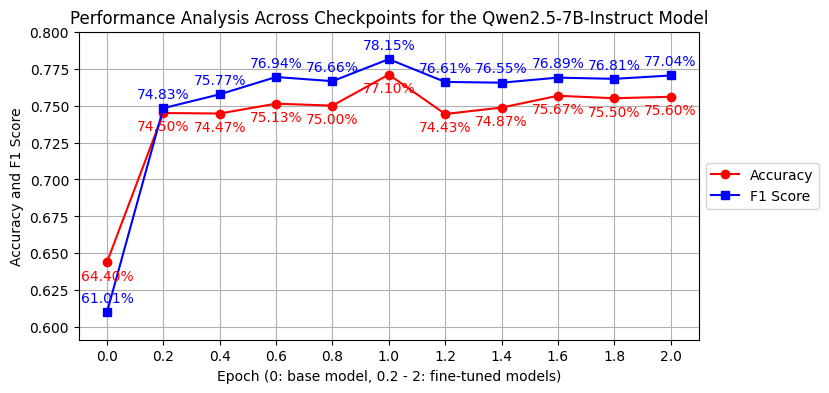

In [49]:
plot_metrics(perf_df, model_name)

In [50]:
perf_df.to_csv(metrics_csv, index=False)

In [51]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['Qwen/Qwen2.5-7B-Instruct/shots-00', 'Qwen/Qwen2.5-7B-Instruct/shots-05', 'Qwen/Qwen2.5-7B-Instruct/shots-10', 'Qwen/Qwen2.5-7B-Instruct/shots-20', 'Qwen/Qwen2.5-7B-Instruct/shots-30', 'Qwen/Qwen2.5-7B-Instruct/shots-40', 'Qwen/Qwen2.5-7B-Instruct/shots-50']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:478: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


shots                model                                run  accuracy  \
0     0  Qwen2.5-7B-Instruct  Qwen/Qwen2.5-7B-Instruct/shots-00  0.644000   
1     5  Qwen2.5-7B-Instruct  Qwen/Qwen2.5-7B-Instruct/shots-05  0.634667   
2    10  Qwen2.5-7B-Instruct  Qwen/Qwen2.5-7B-Instruct/shots-10  0.678000   
3    20  Qwen2.5-7B-Instruct  Qwen/Qwen2.5-7B-Instruct/shots-20  0.735333   
4    30  Qwen2.5-7B-Instruct  Qwen/Qwen2.5-7B-Instruct/shots-30  0.764667   
5    40  Qwen2.5-7B-Instruct  Qwen/Qwen2.5-7B-Instruct/shots-40  0.759000   
6    50  Qwen2.5-7B-Instruct  Qwen/Qwen2.5-7B-Instruct/shots-50  0.758667   

   precision    recall        f1  ratio_valid_classifications  
0   0.720026  0.644000  0.610105                     1.000000  
1   0.765334  0.634667  0.621942                     0.998000  
2   0.767595  0.678000  0.679086                     0.979667  
3   0.770203  0.735333  0.727805                     0.807000  
4   0.778792  0.764667  0.752765                     0.805000  
5   0.773685  0.759000  0.747225                     0.854667  
6   0.764043  0.758667  0.741433                     0.756333

0: Qwen/Qwen2.5-7B-Instruct/shots-00
5: Qwen/Qwen2.5-7B-Instruct/shots-05
10: Qwen/Qwen2.5-7B-Instruct/shots-10
20: Qwen/Qwen2.5-7B-Instruct/shots-20
30: Qwen/Qwen2.5-7B-Instruct/shots-30
40: Qwen/Qwen2.5-7B-Instruct/shots-40
50: Qwen/Qwen2.5-7B-Instruct/shots-50


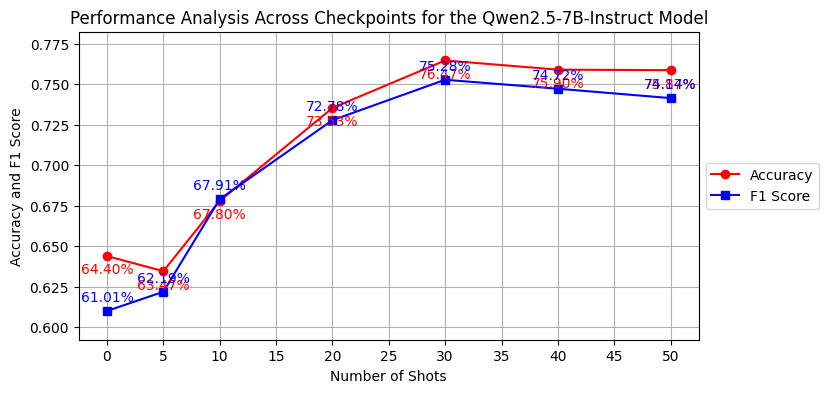

In [52]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [53]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** Qwen/Qwen2.5-7B-Instruct_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct_torch.bfloat16_lf
不是      2333
是        515
问法错误     129
回答正确      20
不重要        3
Name: count, dtype: int64


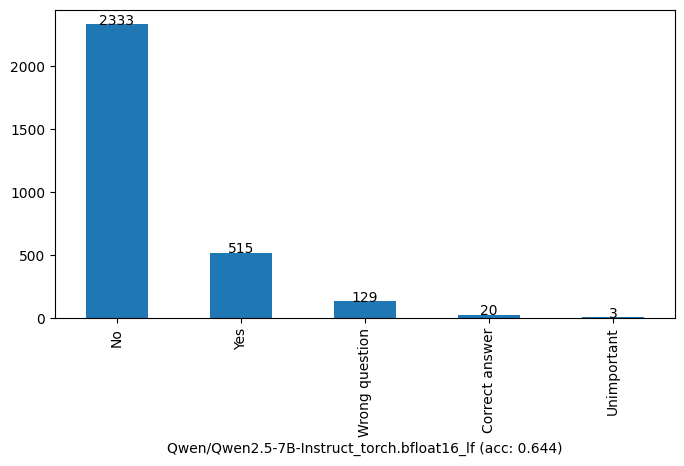

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-35_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-35_torch.bfloat16_lf
不是                  1721
是                   1015
不重要                  215
问法错误                  24
回答正确                  19
物品                     1
小男孩                    1
希望能让爷爷的在天之灵得到安慰。       1
小男孩的                   1
为了记念爷爷                 1
希望能让爷爷的在天之灵得到安慰        1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

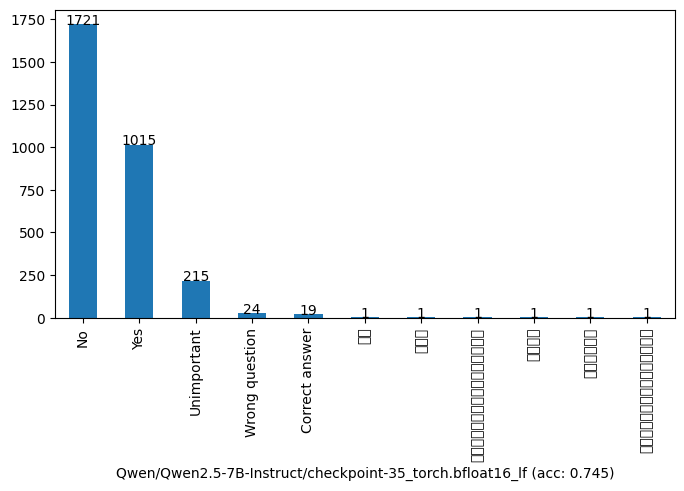

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-70_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-70_torch.bfloat16_lf
不是        1541
是         1078
不重要        322
回答正确        31
问法错误        27
为了记念爷爷       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24565 (\N{CJK UNIFIED IDEOGRAPH-5FF5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

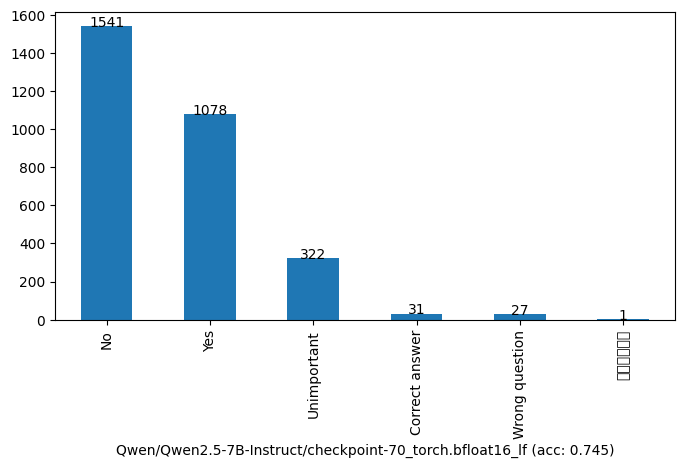

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-105_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-105_torch.bfloat16_lf
不是                  1481
是                   1085
不重要                  379
回答正确                  31
问法错误                  23
是为了让爷爷的在天之灵得到安慰。       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35753 (\N{CJK UNIFIED IDEOGRAPH-8BA9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

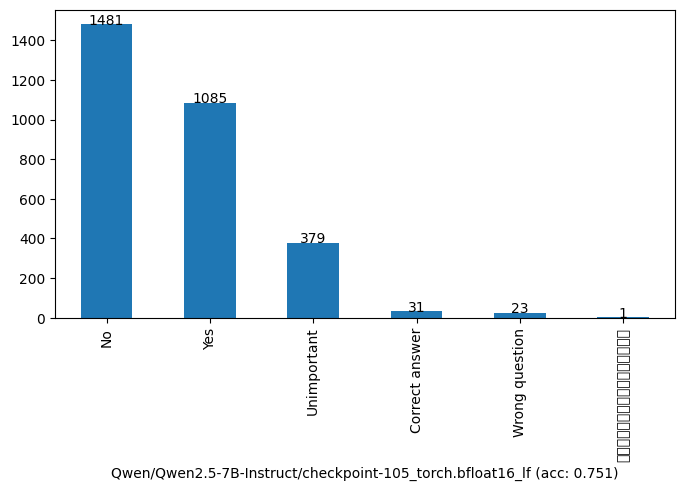

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-140_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-140_torch.bfloat16_lf
不是      1492
是       1098
不重要      327
问法错误      59
回答正确      24
Name: count, dtype: int64


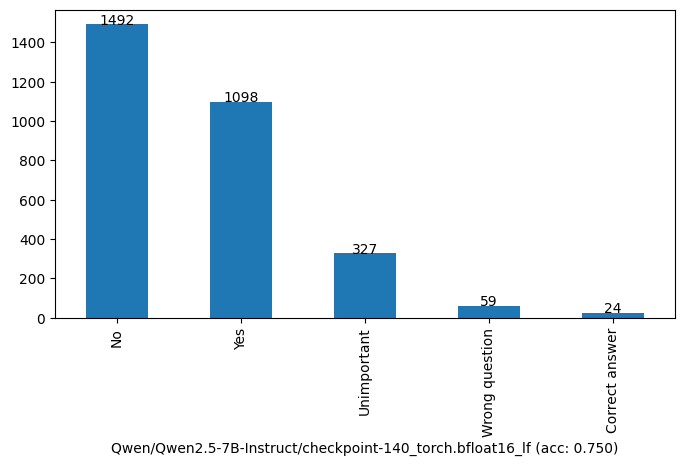

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-175_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-175_torch.bfloat16_lf
不是         1594
是          1064
不重要         274
问法错误         41
回答正确         25
是男孩           1
是为了记念爷爷       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23401 (\N{CJK UNIFIED IDEOGRAPH-5B69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

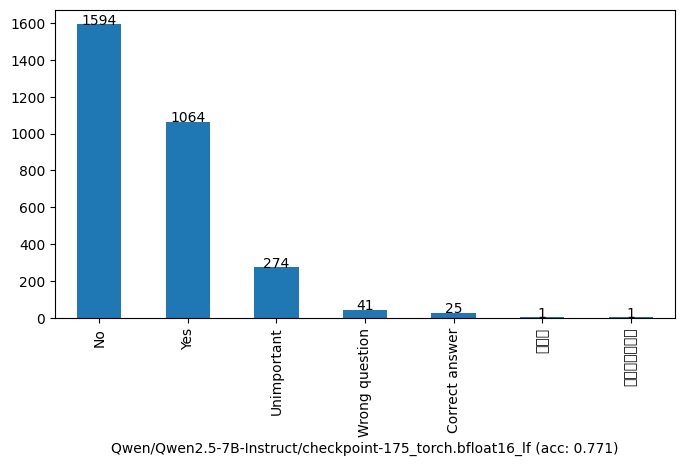

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-210_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-210_torch.bfloat16_lf
不是      1417
是       1121
不重要      393
问法错误      47
回答正确      22
Name: count, dtype: int64


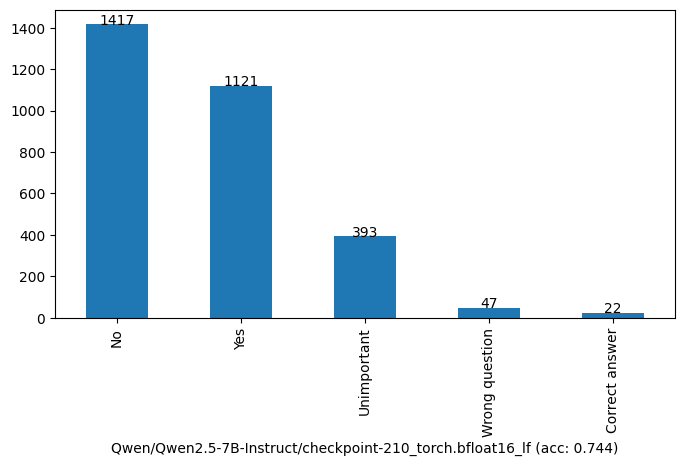

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-245_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-245_torch.bfloat16_lf
不是                 1563
是                  1015
不重要                 359
问法错误                 38
回答正确                 23
是为了记念爷爷               1
希望能让爷爷的在天之灵得到安慰       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

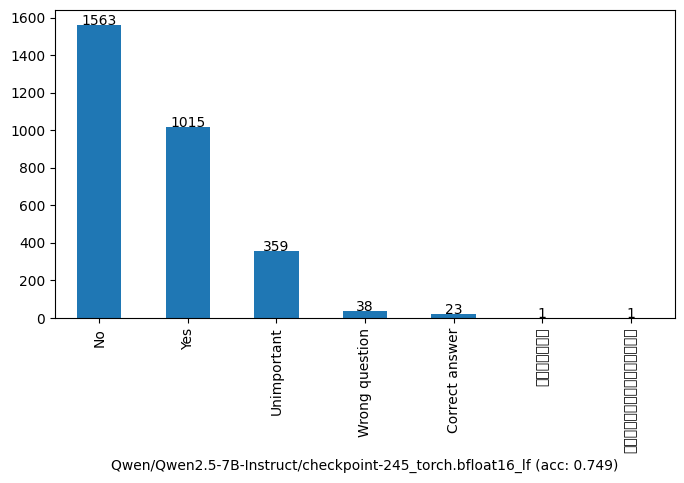

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-280_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-280_torch.bfloat16_lf
不是                 1605
是                  1026
不重要                 307
问法错误                 40
回答正确                 21
希望能让爷爷的在天之灵得到安慰       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24076 (\N{CJK UNIFIED IDEOGRAPH-5E0C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26395 (\N{CJK UNIFIED IDEOGRAPH-671B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35753 (\N{CJK UNIFIED IDEOGRAPH-8BA9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

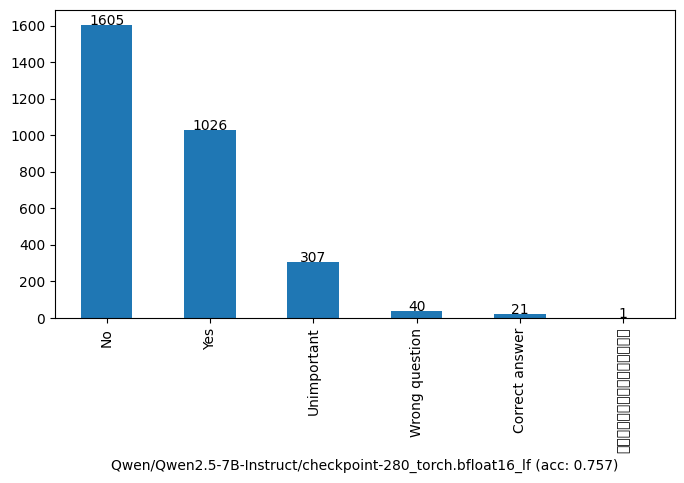

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-315_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-315_torch.bfloat16_lf
不是         1592
是          1027
不重要         317
问法错误         39
回答正确         23
是为了记念爷爷       1
为了祭奠爷爷        1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

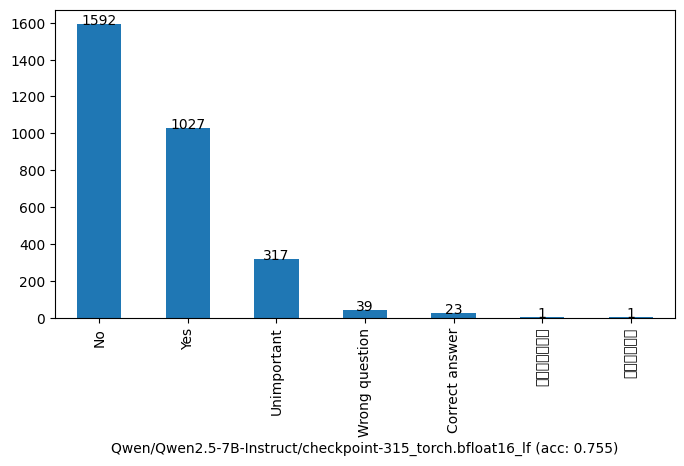

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-350_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-350_torch.bfloat16_lf
不是         1589
是          1019
不重要         321
问法错误         48
回答正确         22
是为了记念爷爷       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

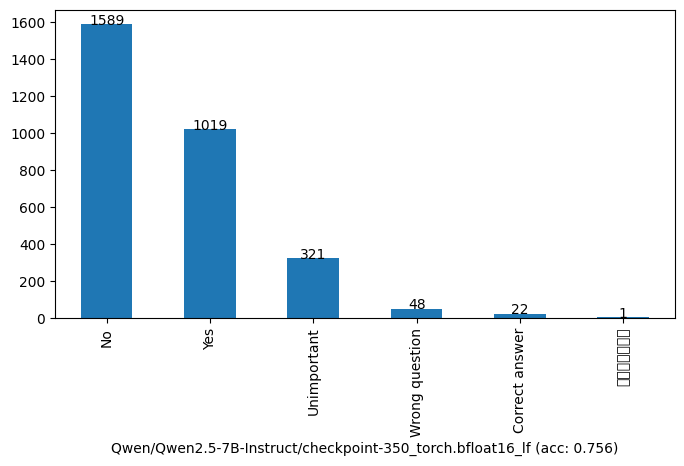

In [54]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** Qwen/Qwen2.5-7B-Instruct_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct_torch.bfloat16_lf
不是      2333
是        515
问法错误     129
回答正确      20
不重要        3
Name: count, dtype: int64


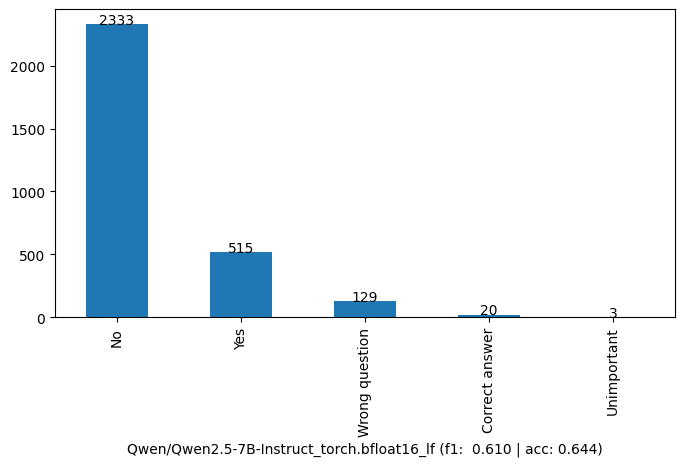

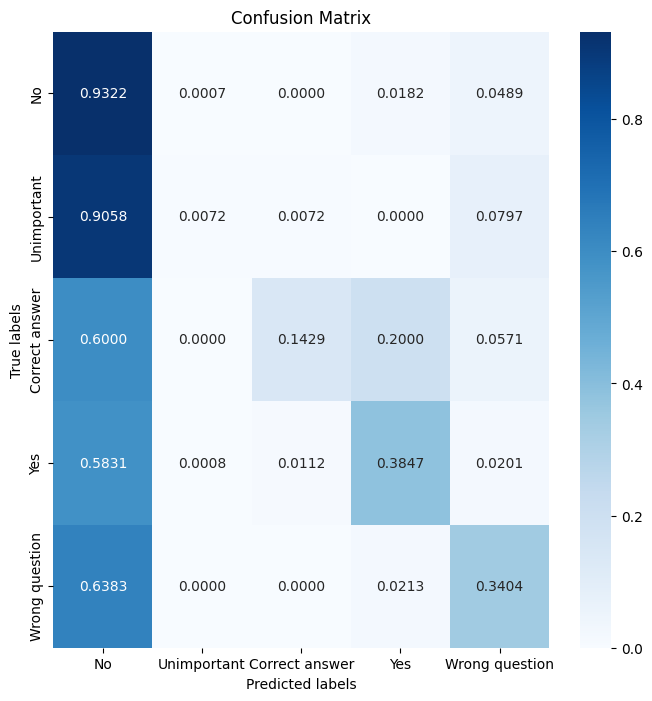

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-35_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-35_torch.bfloat16_lf
不是                  1721
是                   1015
不重要                  215
问法错误                  24
回答正确                  19
物品                     1
小男孩                    1
希望能让爷爷的在天之灵得到安慰。       1
小男孩的                   1
为了记念爷爷                 1
希望能让爷爷的在天之灵得到安慰        1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24076 (\N{CJK UNIFIED IDEOGRAPH-5E0C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26395 (\N{CJK UNIFIED IDEOGRAPH-671B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35753 (\N{CJK UNIFIED IDEOGRAPH-8BA9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

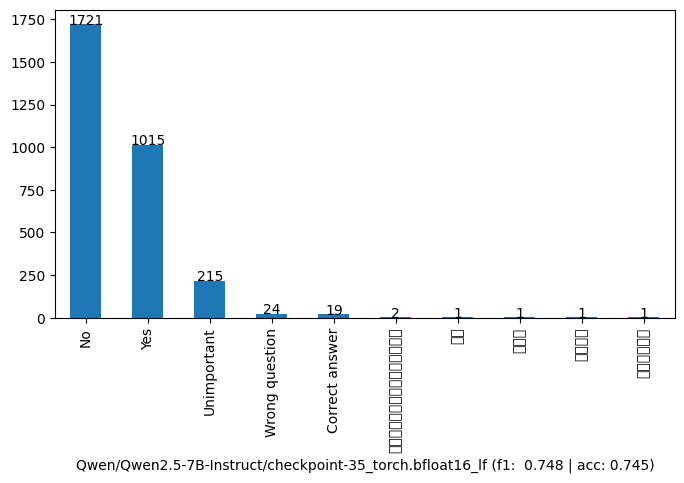

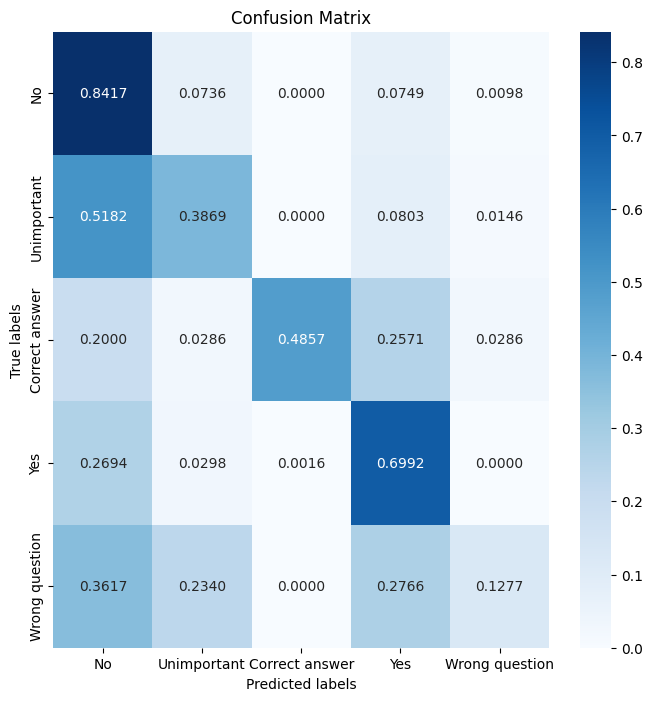

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-70_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-70_torch.bfloat16_lf
不是        1541
是         1078
不重要        322
回答正确        31
问法错误        27
为了记念爷爷       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24565 (\N{CJK UNIFIED IDEOGRAPH-5FF5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

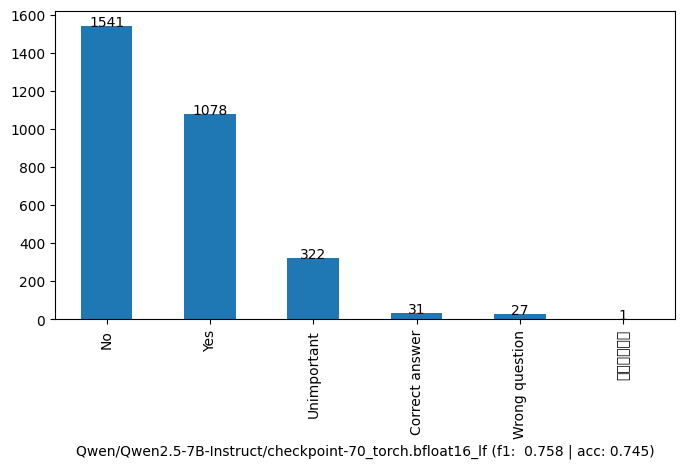

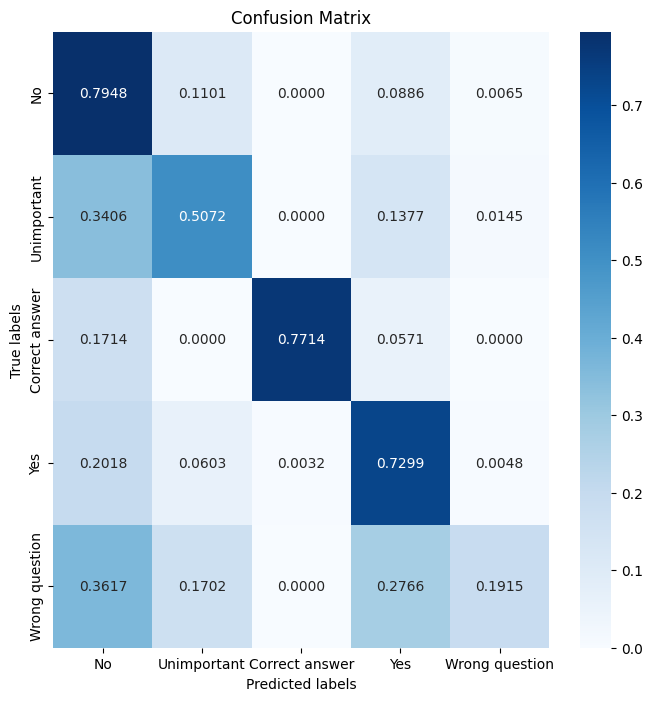

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-105_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-105_torch.bfloat16_lf
不是                  1481
是                   1085
不重要                  379
回答正确                  31
问法错误                  23
是为了让爷爷的在天之灵得到安慰。       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35753 (\N{CJK UNIFIED IDEOGRAPH-8BA9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

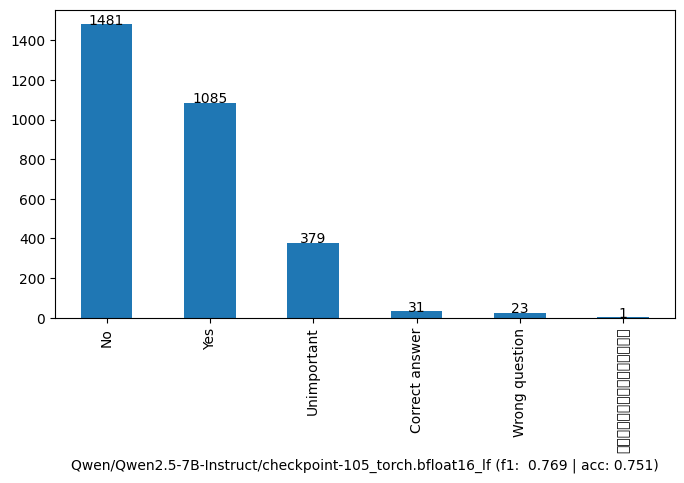

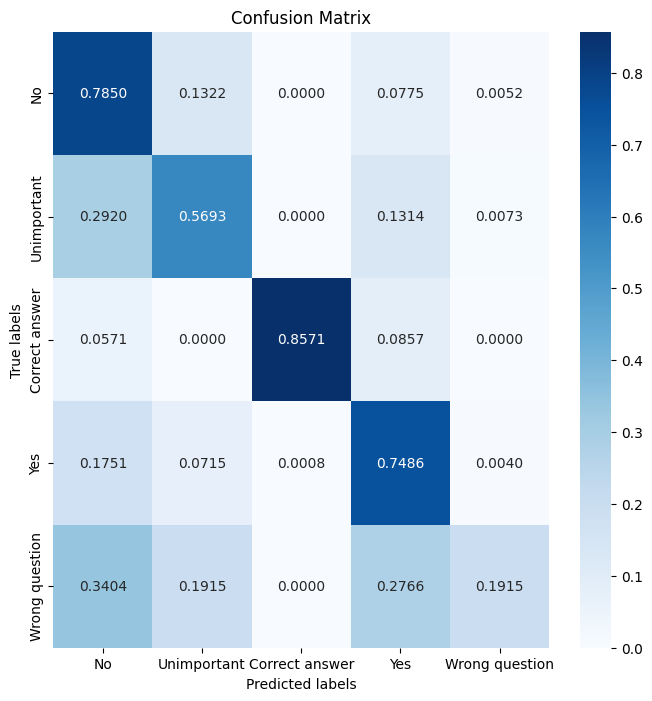

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-140_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-140_torch.bfloat16_lf
不是      1492
是       1098
不重要      327
问法错误      59
回答正确      24
Name: count, dtype: int64


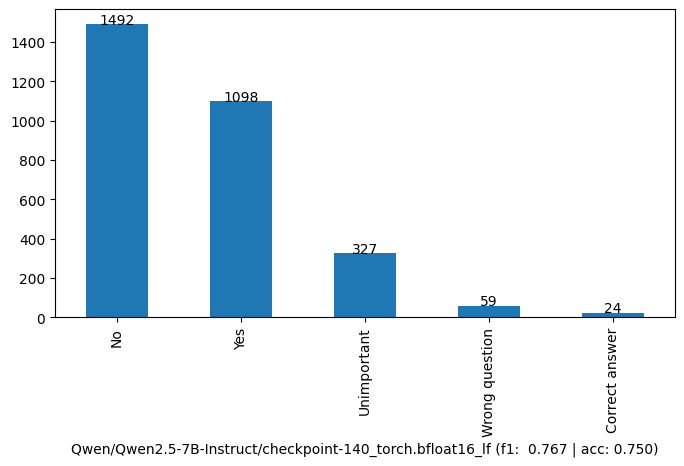

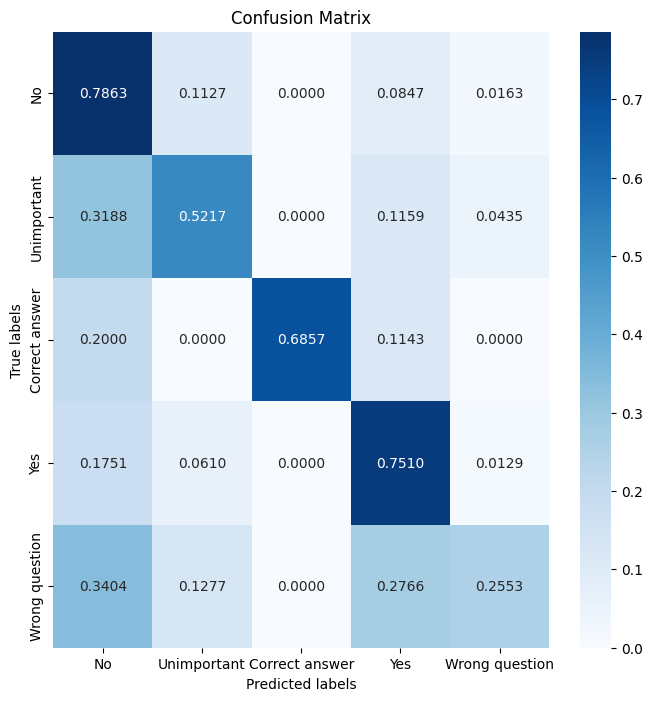

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-175_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-175_torch.bfloat16_lf
不是         1594
是          1064
不重要         274
问法错误         41
回答正确         25
是男孩           1
是为了记念爷爷       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23401 (\N{CJK UNIFIED IDEOGRAPH-5B69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

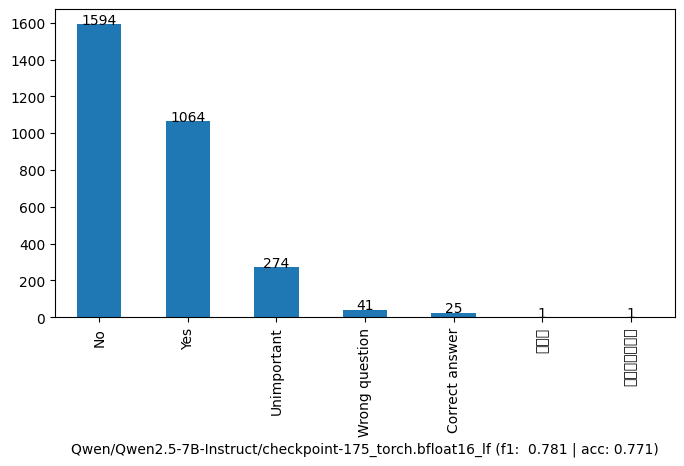

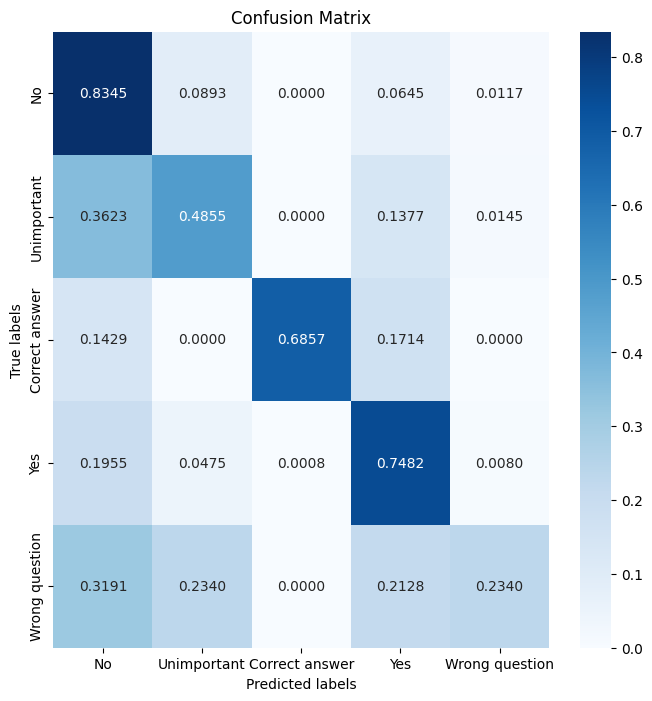

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-210_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-210_torch.bfloat16_lf
不是      1417
是       1121
不重要      393
问法错误      47
回答正确      22
Name: count, dtype: int64


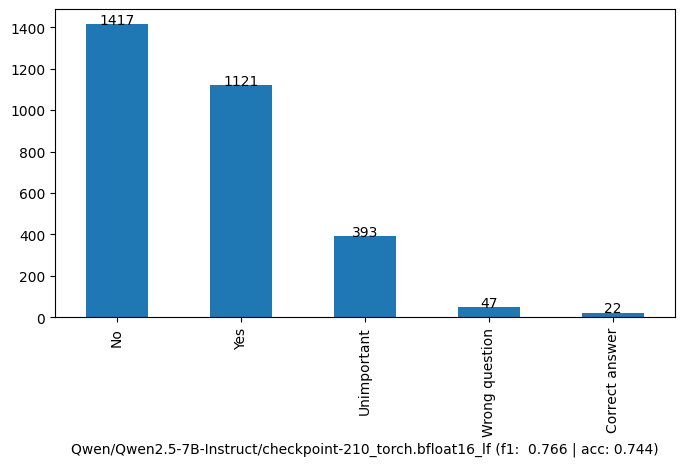

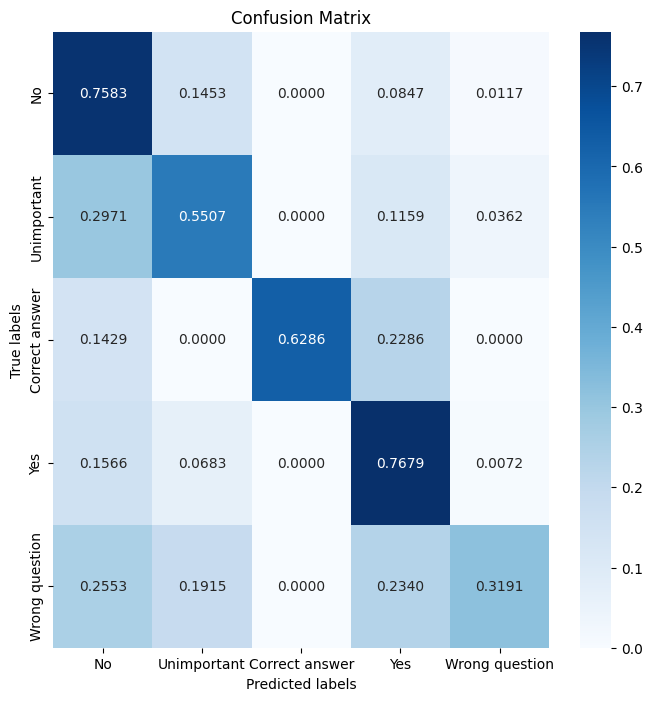

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-245_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-245_torch.bfloat16_lf
不是                 1563
是                  1015
不重要                 359
问法错误                 38
回答正确                 23
是为了记念爷爷               1
希望能让爷爷的在天之灵得到安慰       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

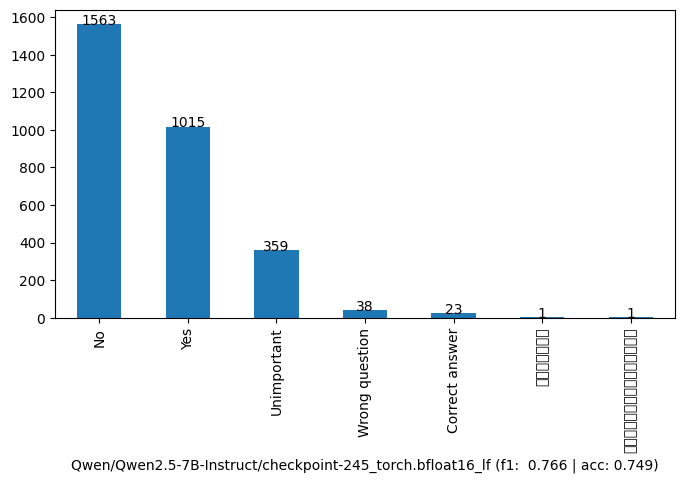

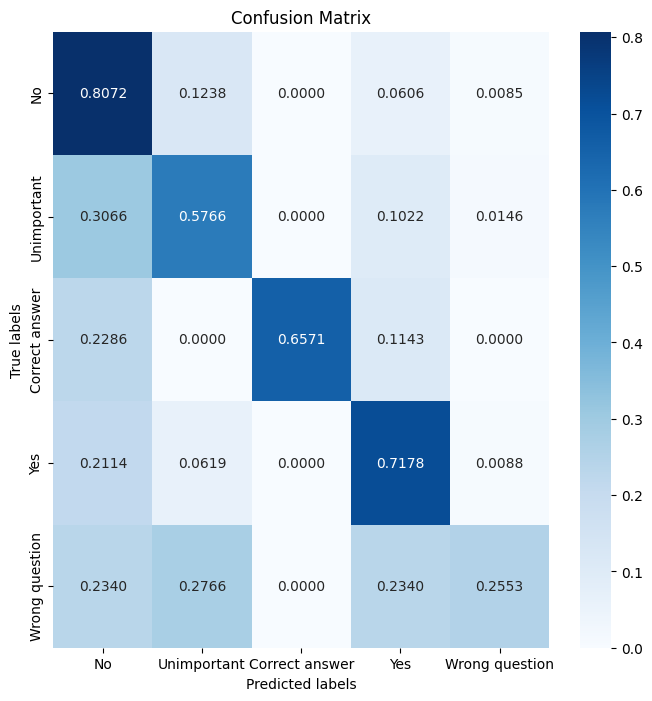

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-280_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-280_torch.bfloat16_lf
不是                 1605
是                  1026
不重要                 307
问法错误                 40
回答正确                 21
希望能让爷爷的在天之灵得到安慰       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24076 (\N{CJK UNIFIED IDEOGRAPH-5E0C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26395 (\N{CJK UNIFIED IDEOGRAPH-671B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35753 (\N{CJK UNIFIED IDEOGRAPH-8BA9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

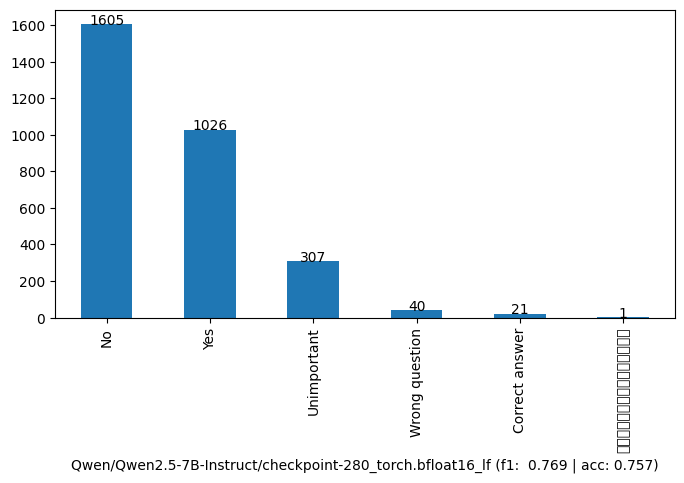

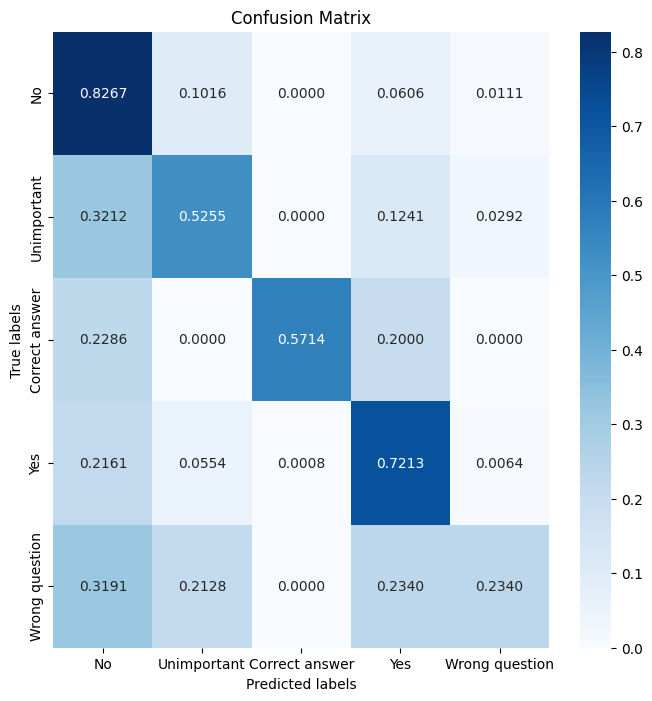

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-315_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-315_torch.bfloat16_lf
不是         1592
是          1027
不重要         317
问法错误         39
回答正确         23
是为了记念爷爷       1
为了祭奠爷爷        1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

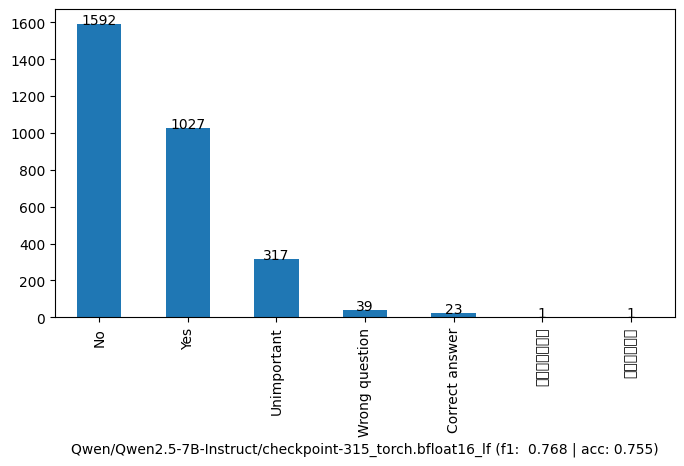

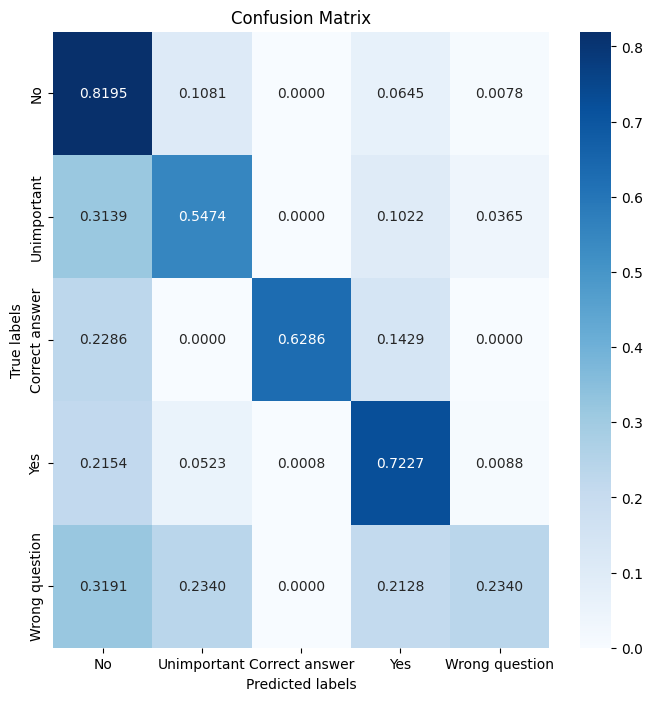

********** Qwen/Qwen2.5-7B-Instruct/checkpoint-350_torch.bfloat16_lf **********
Qwen/Qwen2.5-7B-Instruct/checkpoint-350_torch.bfloat16_lf
不是         1589
是          1019
不重要         321
问法错误         48
回答正确         22
是为了记念爷爷       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

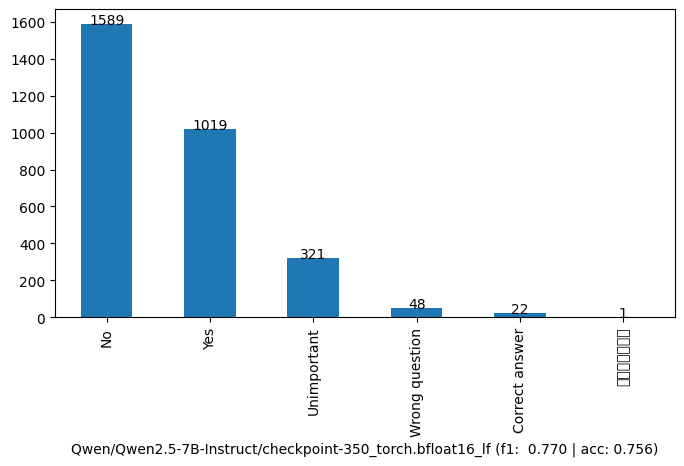

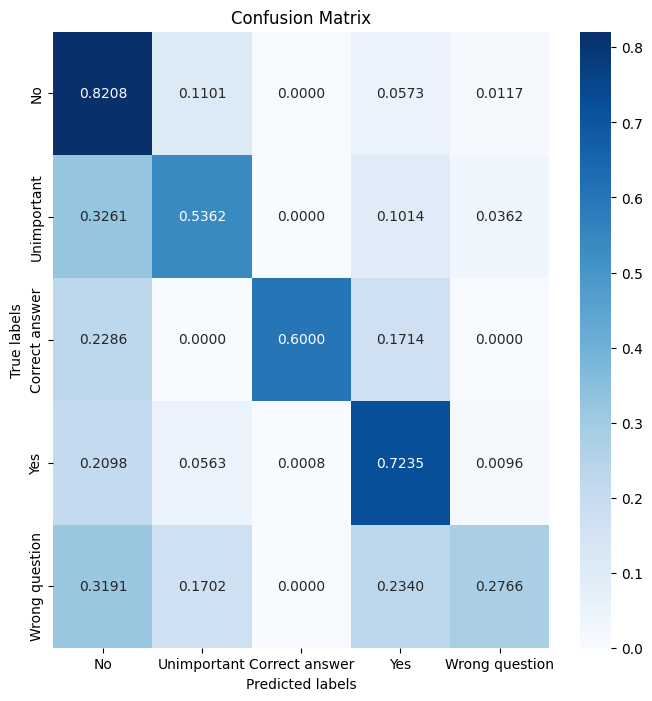

In [55]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

********** Qwen/Qwen2.5-7B-Instruct/shots-00 **********
Qwen/Qwen2.5-7B-Instruct/shots-00
不是      2333
是        515
问法错误     129
回答正确      20
不重要        3
Name: count, dtype: int64


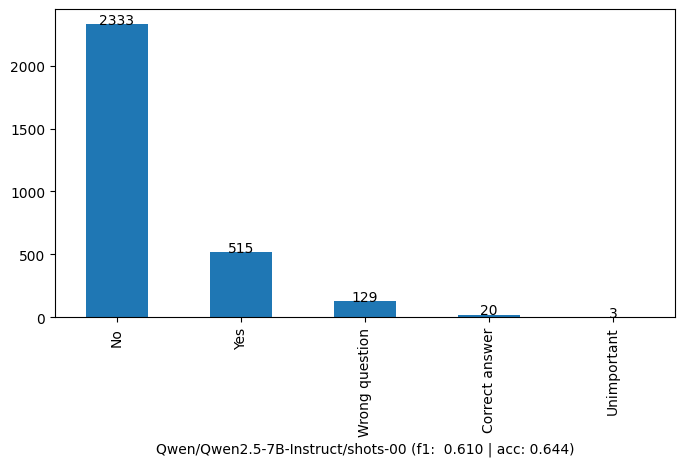

********** Qwen/Qwen2.5-7B-Instruct/shots-05 **********
Qwen/Qwen2.5-7B-Instruct/shots-05
不是                            2053
是                              462
回答正确                           429
问法错误                            39
不重要                             11
他要带走的是物品。不是                      1
小男孩的哭声                           1
参与者提出的问题: 怎么还原\n\n回答: 问法错误       1
为了纪念爷爷，并希望让爷爷的在天之灵得到安慰。          1
去湖边寻找哭泣声的来源                      1
是因为小男孩想起了爷爷，感到非常伤心。              1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20182 (\N{CJK UNIFIED IDEOGRAPH-4ED6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

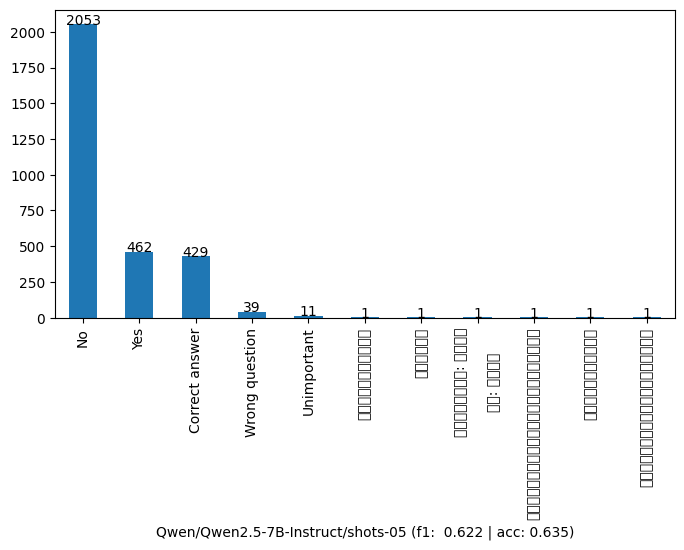

********** Qwen/Qwen2.5-7B-Instruct/shots-10 **********
Qwen/Qwen2.5-7B-Instruct/shots-10
不是                                                       1936
是                                                         580
回答正确                                                      306
不重要                                                        71
问法错误                                                       46
回答: 是                                                      28
回答: 不是                                                      6
回答: 不重要                                                     6
回答: 问法错误                                                    2
参与者提出的问题: 哭声\n回答: 是                                         2
帽子是小男孩的。                                                    2
小男孩                                                         1
去湖边是因为发现湖边的石头上放着一顶破旧的帽子。                                    1
因为小男孩希望能让爷爷的在天之灵得到安慰。                                       1
回答: 回答正确                                  

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

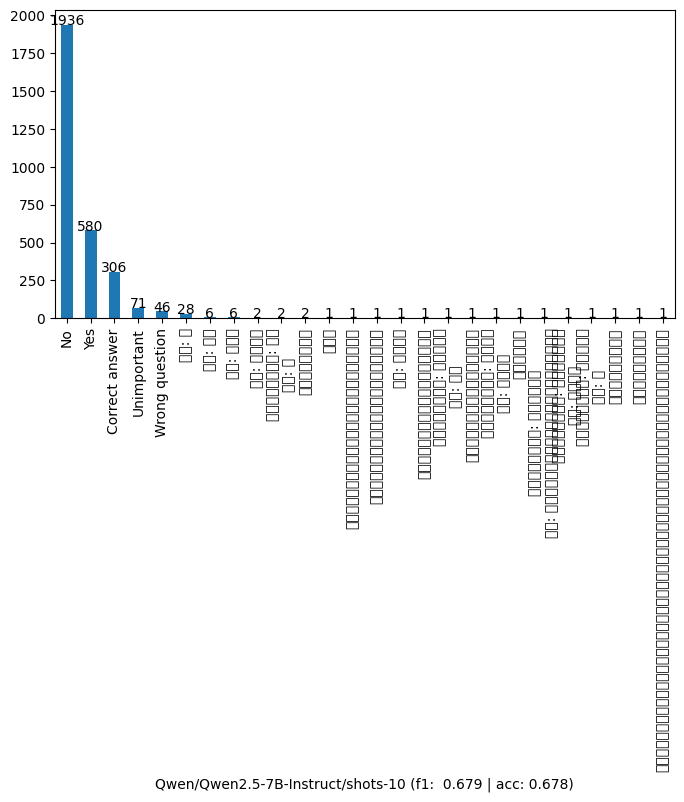

********** Qwen/Qwen2.5-7B-Instruct/shots-20 **********
Qwen/Qwen2.5-7B-Instruct/shots-20
不是                                                                                                                              1901
回答: 是                                                                                                                            500
是                                                                                                                                335
回答正确                                                                                                                             111
问法错误                                                                                                                              57
回答: 回答正确                                                                                                                          34
不重要                                                                                                             

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

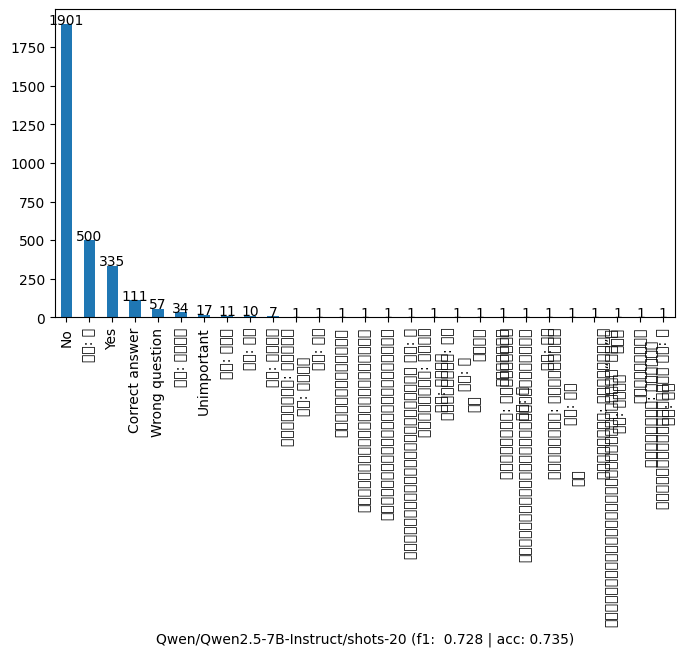

********** Qwen/Qwen2.5-7B-Instruct/shots-30 **********
Qwen/Qwen2.5-7B-Instruct/shots-30
不是                                                                                                                                                                                                                                                                                                                                                 1934
回答: 是                                                                                                                                                                                                                                                                                                                                               501
是                                                                                                                                                                                                                             

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

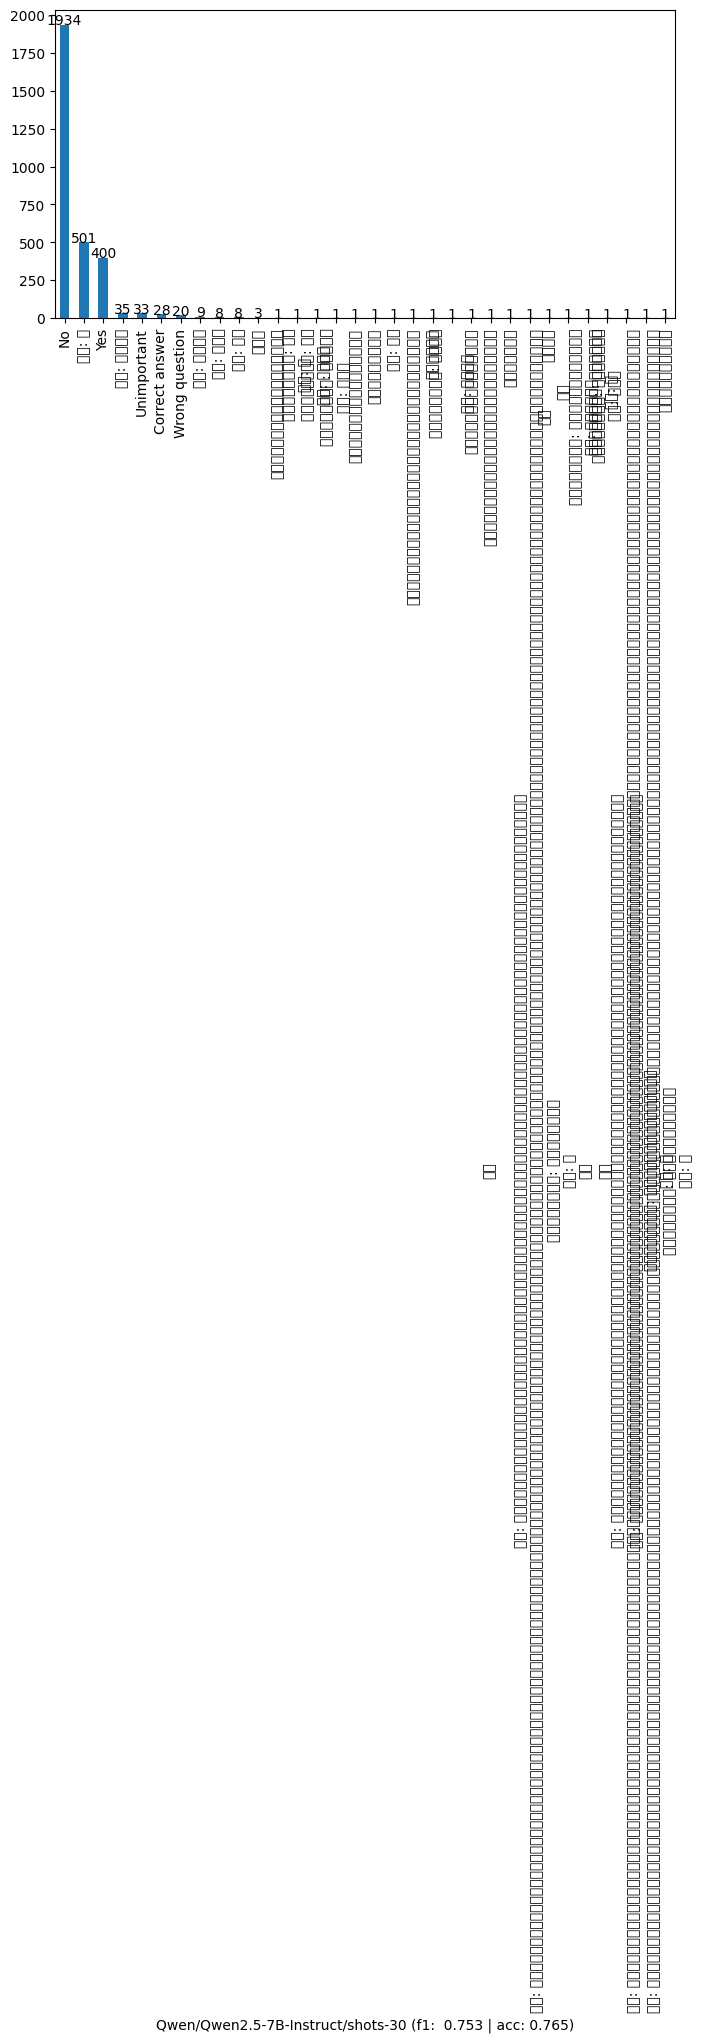

********** Qwen/Qwen2.5-7B-Instruct/shots-40 **********
Qwen/Qwen2.5-7B-Instruct/shots-40
不是                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

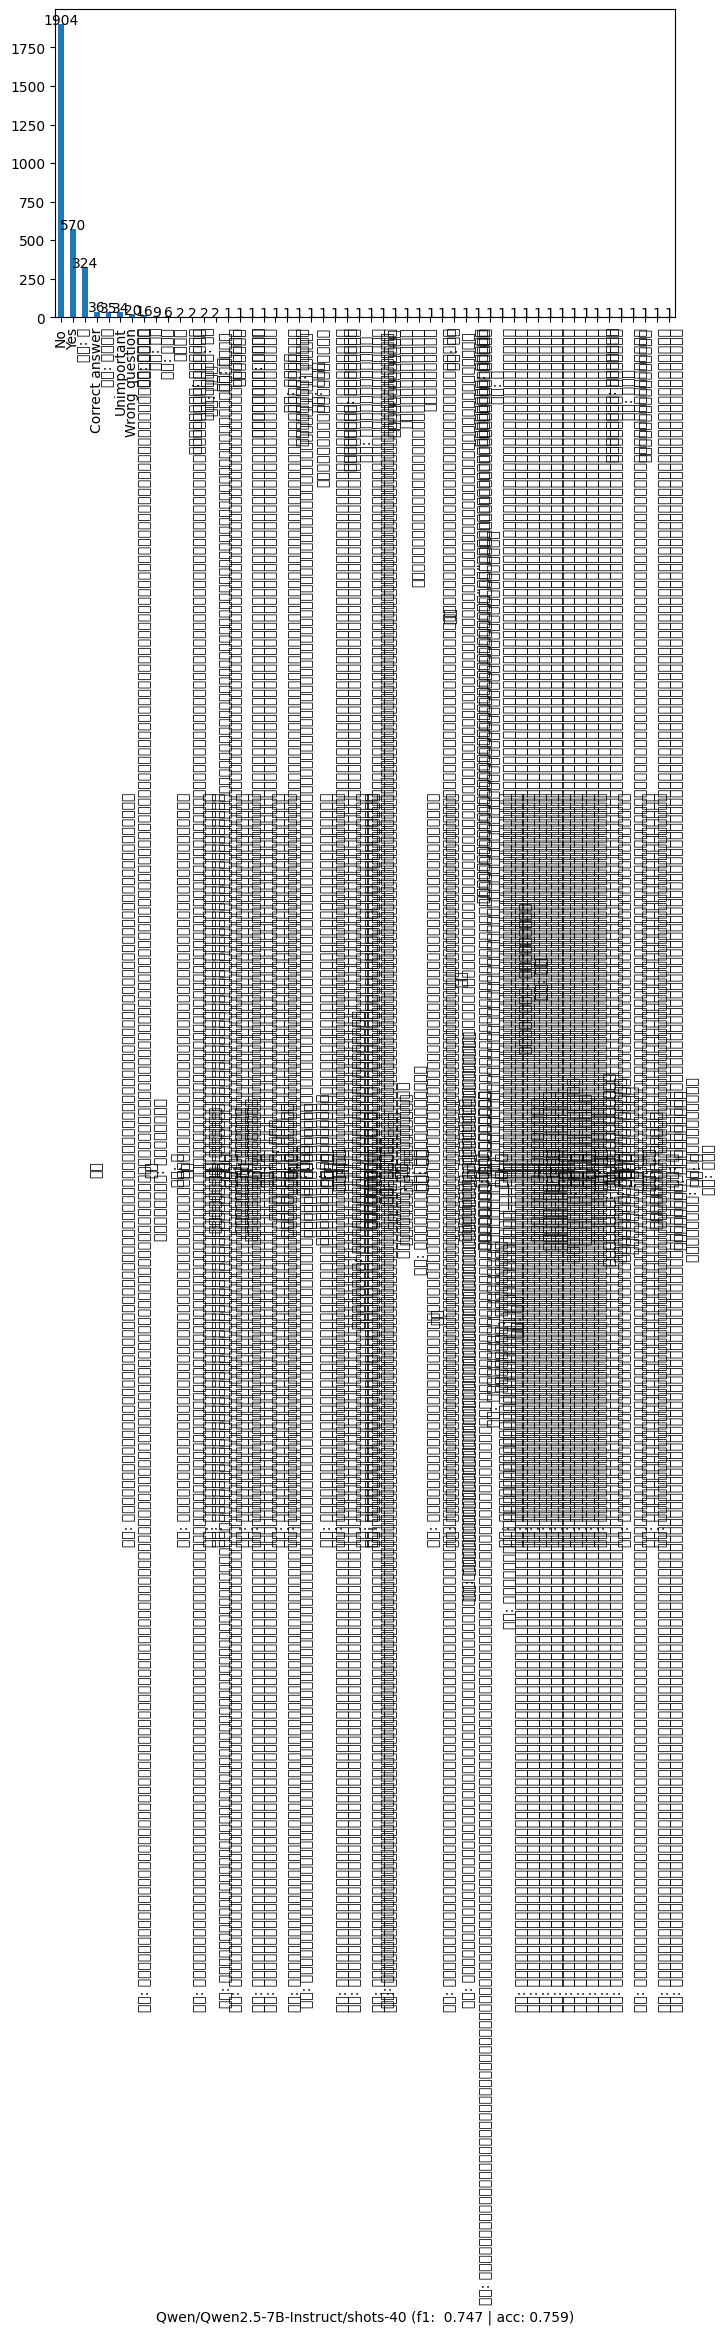

********** Qwen/Qwen2.5-7B-Instruct/shots-50 **********
Qwen/Qwen2.5-7B-Instruct/shots-50
不是                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

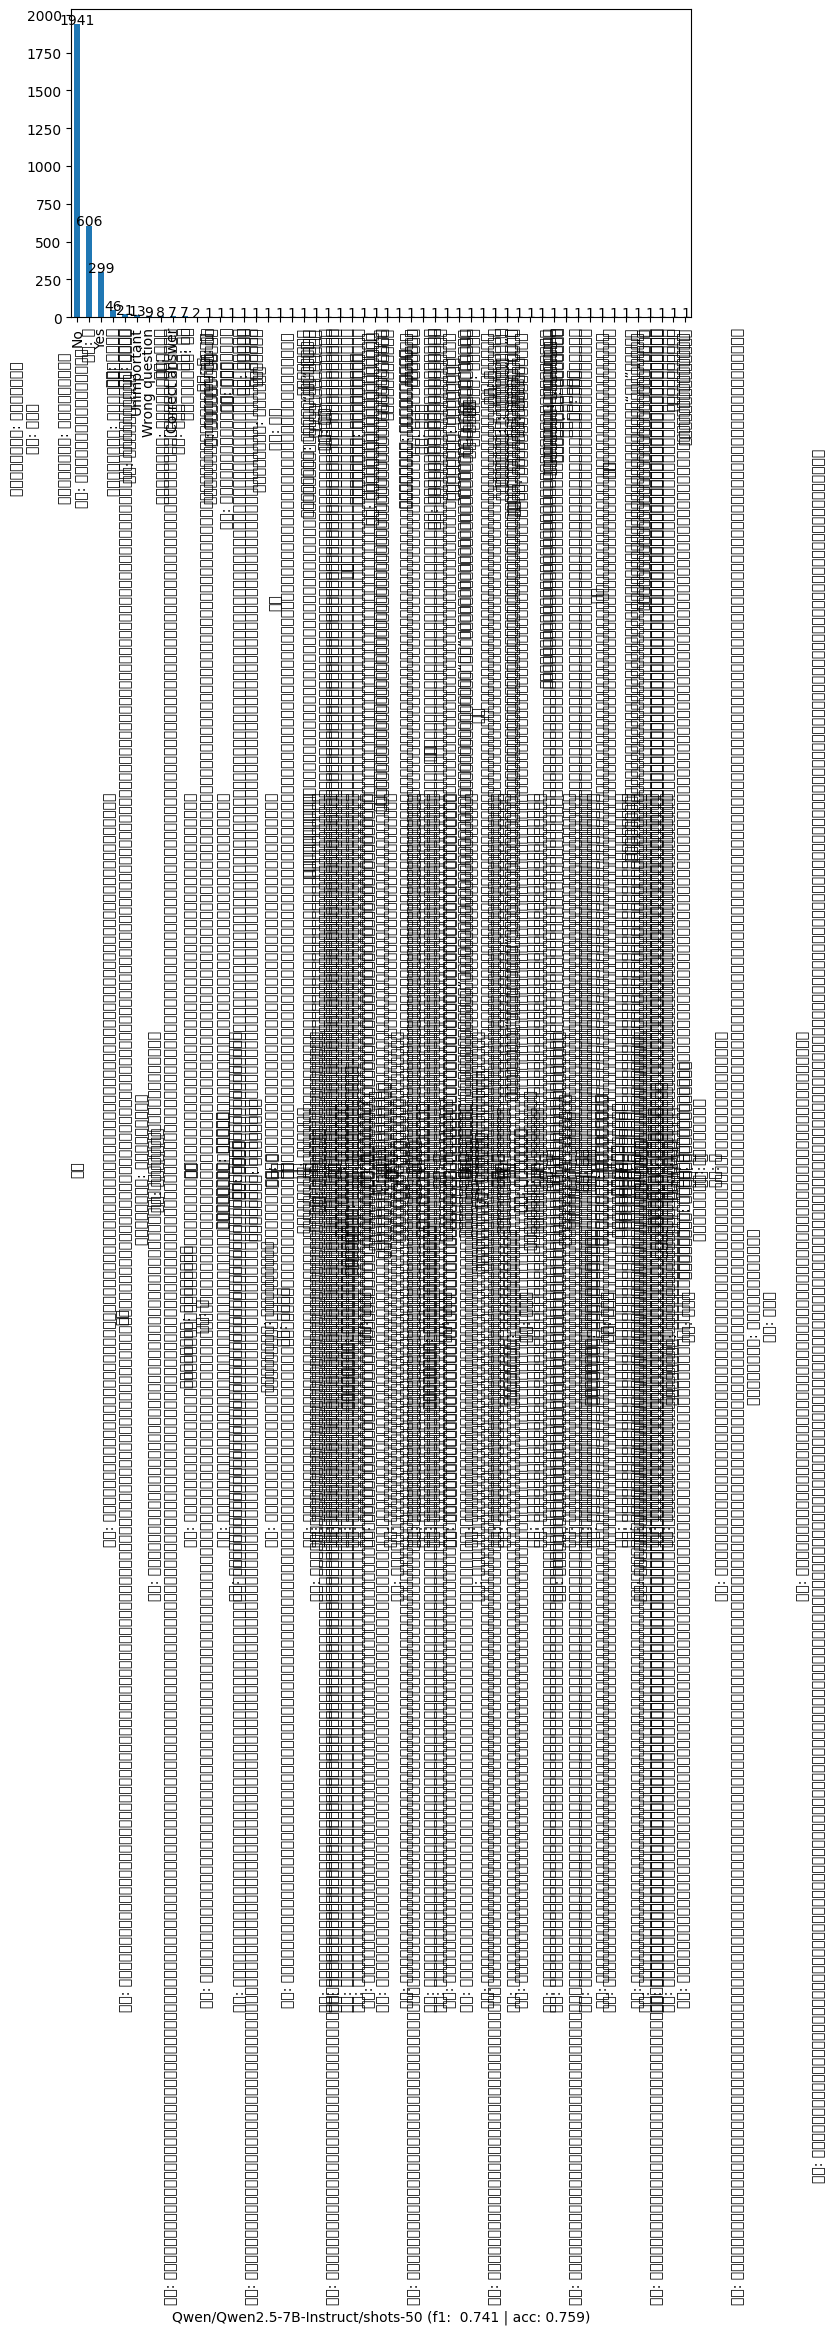

In [56]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
    )

********** Qwen/Qwen2.5-7B-Instruct/shots-00 **********
Qwen/Qwen2.5-7B-Instruct/shots-00
不是      2333
是        515
问法错误     129
回答正确      20
不重要        3
Name: count, dtype: int64


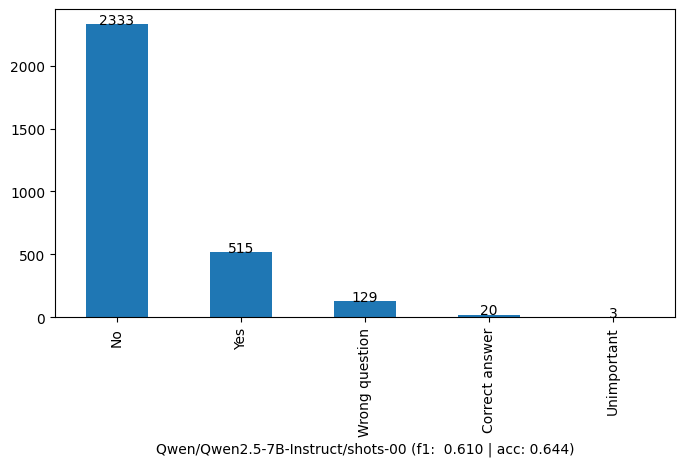

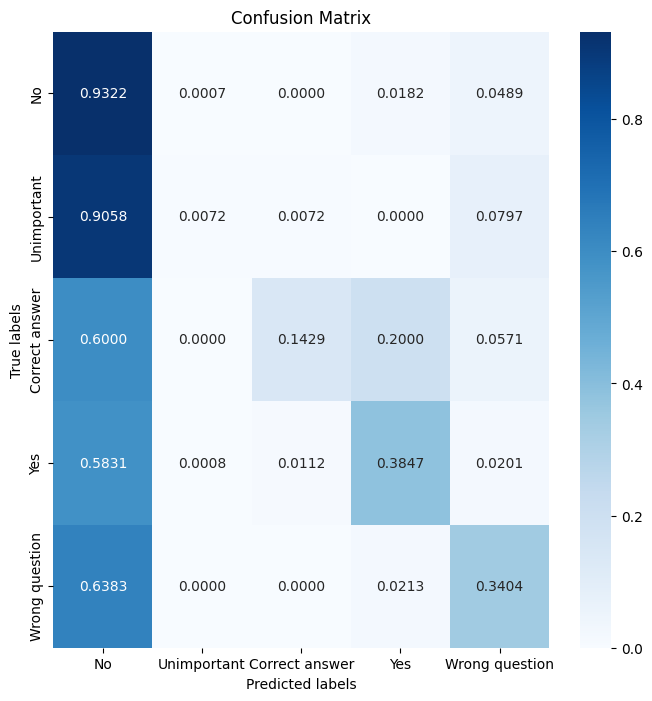

********** Qwen/Qwen2.5-7B-Instruct/shots-05 **********
Qwen/Qwen2.5-7B-Instruct/shots-05
不是                            2053
是                              462
回答正确                           429
问法错误                            39
不重要                             11
他要带走的是物品。不是                      1
小男孩的哭声                           1
参与者提出的问题: 怎么还原\n\n回答: 问法错误       1
为了纪念爷爷，并希望让爷爷的在天之灵得到安慰。          1
去湖边寻找哭泣声的来源                      1
是因为小男孩想起了爷爷，感到非常伤心。              1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20182 (\N{CJK UNIFIED IDEOGRAPH-4ED6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

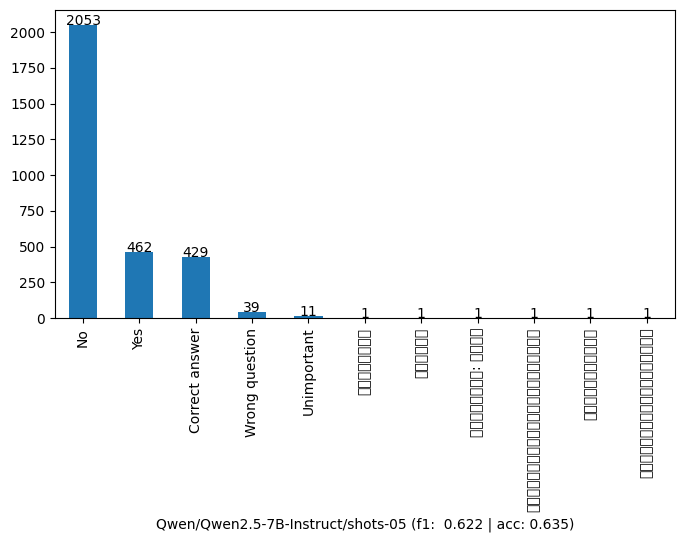

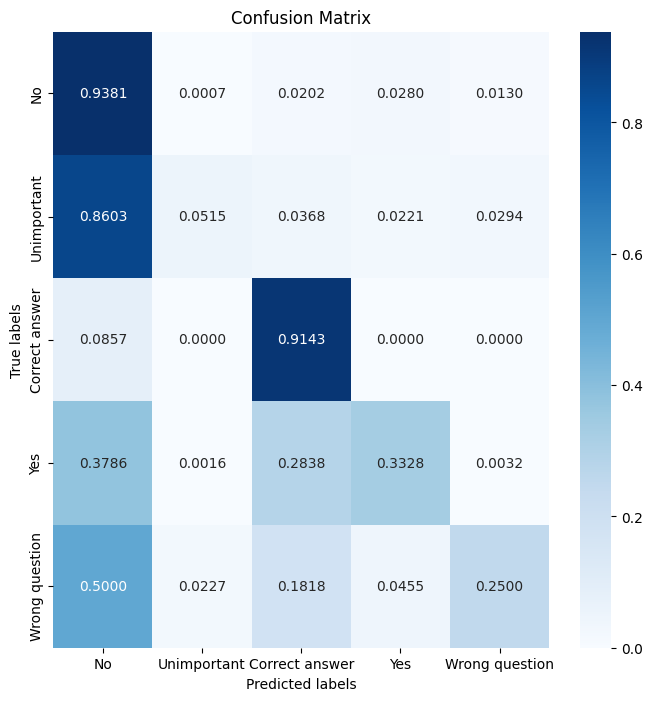

********** Qwen/Qwen2.5-7B-Instruct/shots-10 **********
Qwen/Qwen2.5-7B-Instruct/shots-10
不是                                                       1936
是                                                         580
回答正确                                                      306
不重要                                                        71
问法错误                                                       46
回答: 是                                                      28
回答: 不是                                                      6
回答: 不重要                                                     6
回答: 问法错误                                                    2
参与者提出的问题: 哭声\n回答: 是                                         2
帽子是小男孩的。                                                    2
小男孩                                                         1
去湖边是因为发现湖边的石头上放着一顶破旧的帽子。                                    1
因为小男孩希望能让爷爷的在天之灵得到安慰。                                       1
回答: 回答正确                                  

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

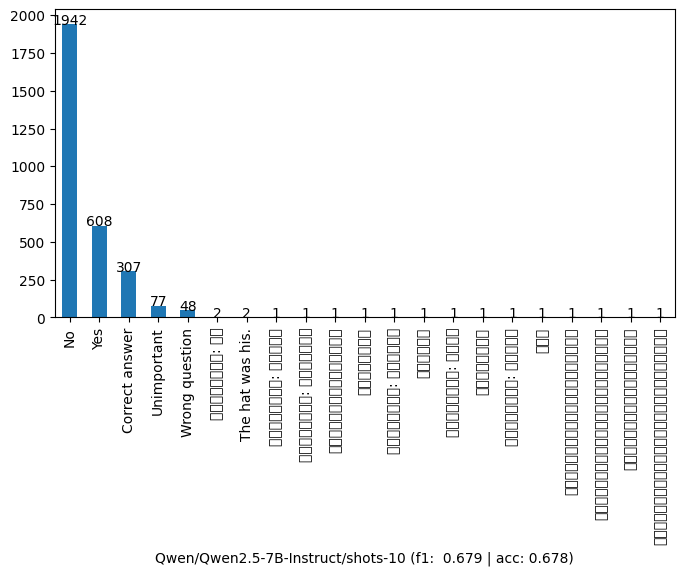

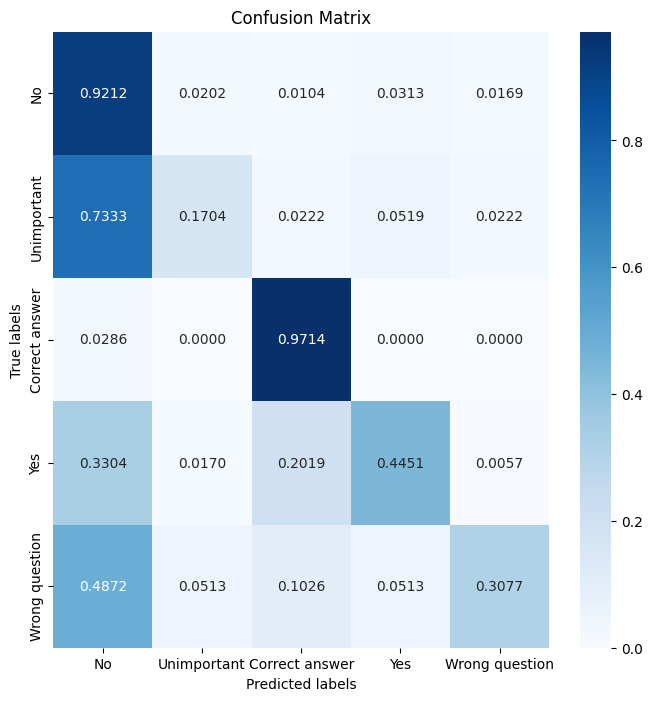

********** Qwen/Qwen2.5-7B-Instruct/shots-20 **********
Qwen/Qwen2.5-7B-Instruct/shots-20
不是                                                                                                                              1901
回答: 是                                                                                                                            500
是                                                                                                                                335
回答正确                                                                                                                             111
问法错误                                                                                                                              57
回答: 回答正确                                                                                                                          34
不重要                                                                                                             

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

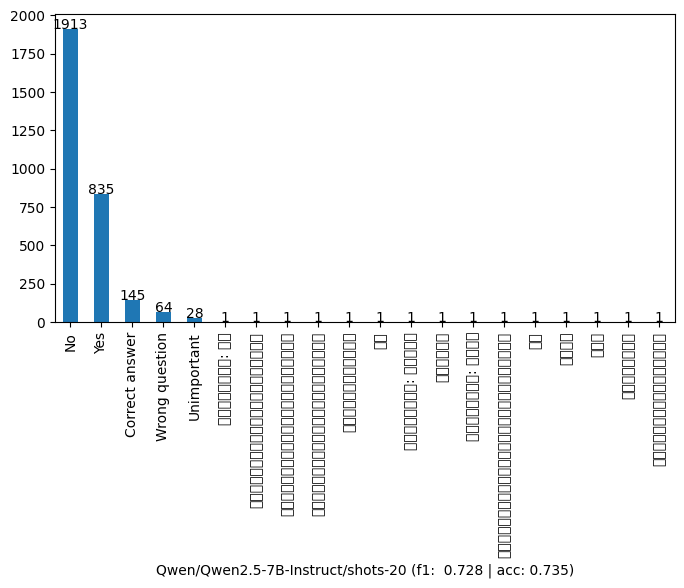

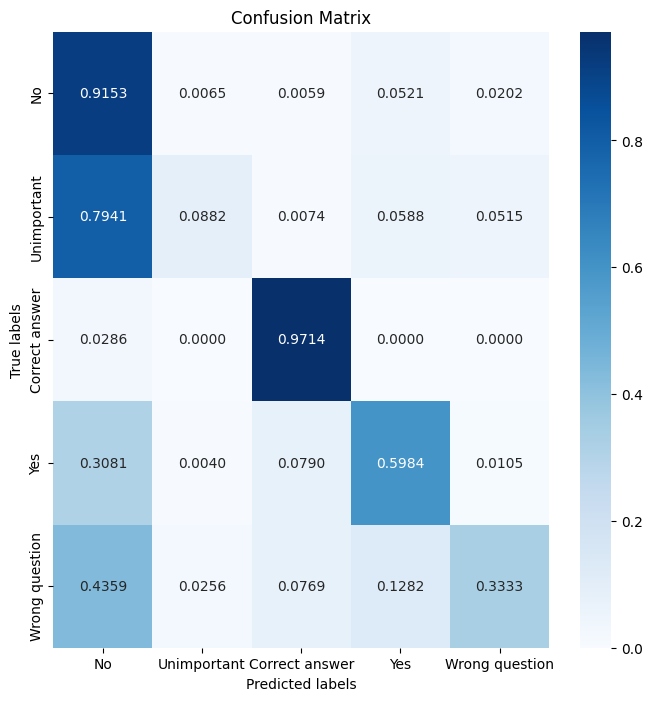

********** Qwen/Qwen2.5-7B-Instruct/shots-30 **********
Qwen/Qwen2.5-7B-Instruct/shots-30
不是                                                                                                                                                                                                                                                                                                                                                 1934
回答: 是                                                                                                                                                                                                                                                                                                                                               501
是                                                                                                                                                                                                                             

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23401 (\N{CJK UNIFIED IDEOGRAPH-5B69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

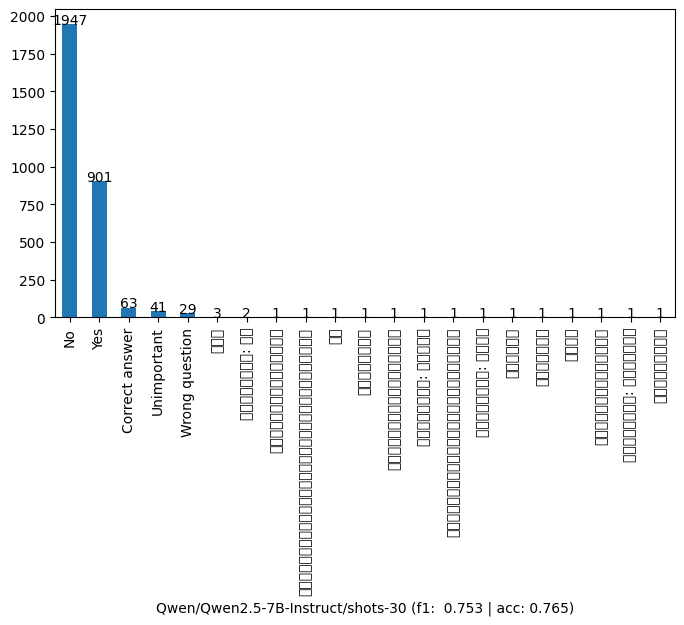

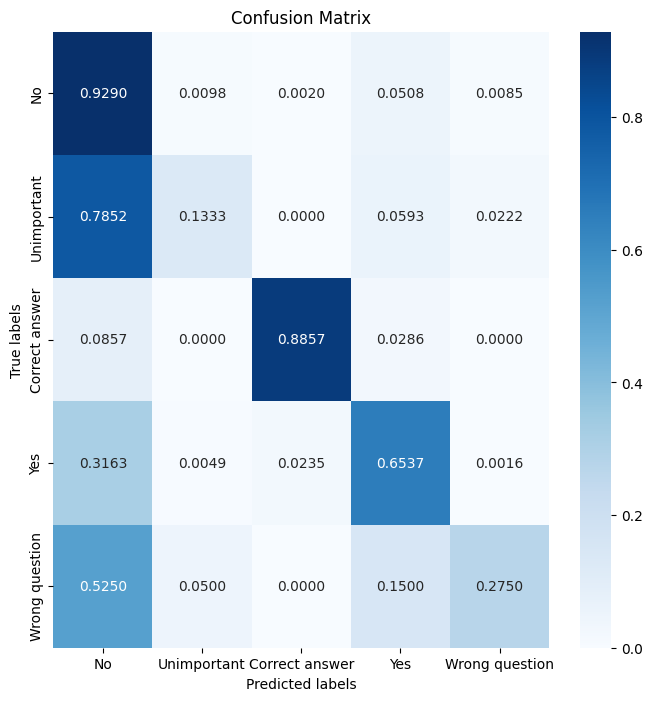

********** Qwen/Qwen2.5-7B-Instruct/shots-40 **********
Qwen/Qwen2.5-7B-Instruct/shots-40
不是                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

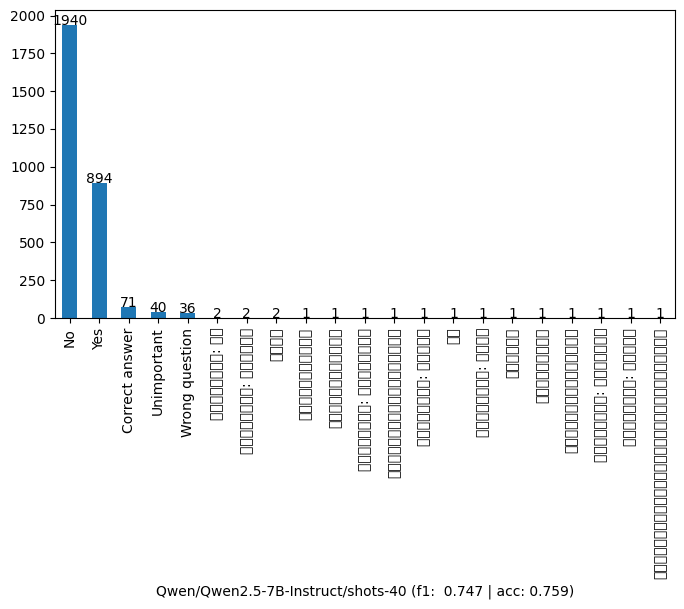

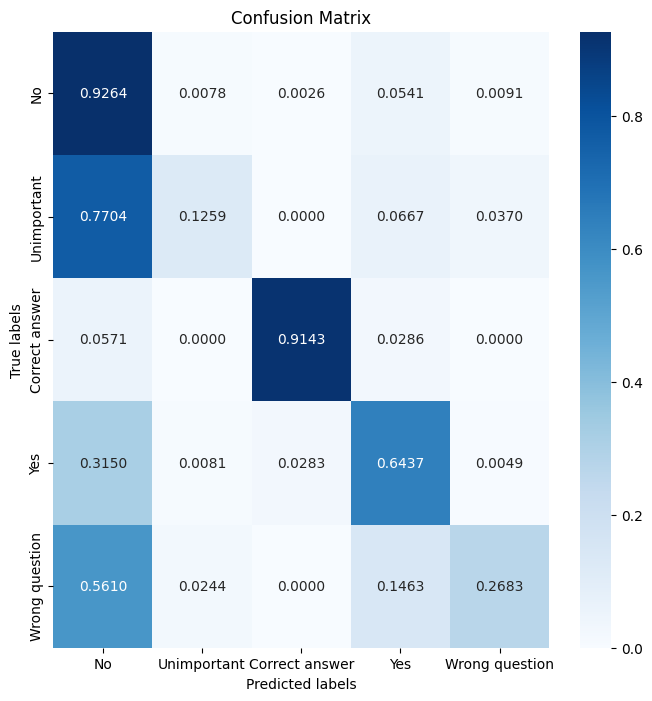

********** Qwen/Qwen2.5-7B-Instruct/shots-50 **********
Qwen/Qwen2.5-7B-Instruct/shots-50
不是                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

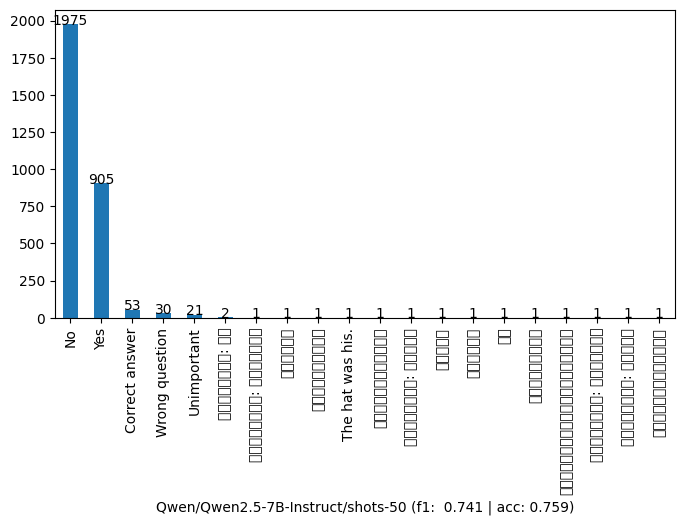

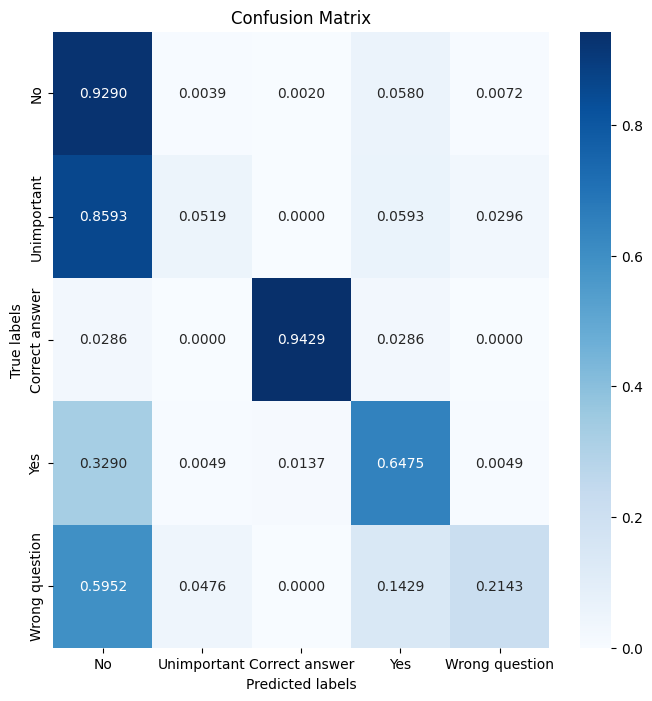

In [57]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )